# **Descriptive analysis**
- What is the average track popularity each year?
- How has the average danceability of tracks changed over the years?
- Which artists have the highest average track popularity in the dataset?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('playlist_2010to2022.csv')
df

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [3]:
df.columns = [col.replace('_',' ') for col in df.columns]
df.columns

Index(['playlist url', 'year', 'track id', 'track name', 'track popularity',
       'album', 'artist id', 'artist name', 'artist genres',
       'artist popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration ms', 'time signature'],
      dtype='object')

In [4]:
df.isnull().sum()

playlist url         0
year                 0
track id             0
track name           0
track popularity     0
album                0
artist id            0
artist name          0
artist genres        0
artist popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration ms          1
time signature       1
dtype: int64

In [5]:
# Drop rows with missing values in the specified columns
# df.dropna(subset=['loudness', 'tempo', 'acousticness']).isnull().sum()
df_cleaned = df.dropna() # drop all rows that has missing data
df_cleaned.isnull().sum()

playlist url         0
year                 0
track id             0
track name           0
track popularity     0
album                0
artist id            0
artist name          0
artist genres        0
artist popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration ms          0
time signature       0
dtype: int64

## What is the average track popularity each year?

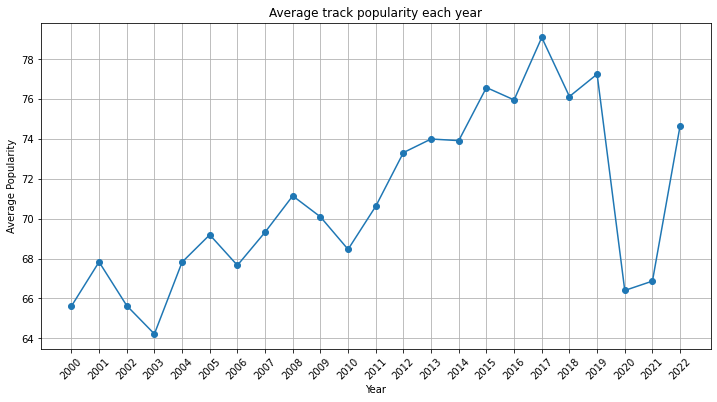

In [6]:
avg_track_popularity_each_year = df_cleaned.groupby('year')['track popularity'].mean()

plt.figure(figsize = (12,6))
avg_track_popularity_each_year.plot(marker='o', linestyle='-')
plt.title('Average track popularity each year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.xticks(list(avg_track_popularity_each_year.index), rotation=45)
plt.show()

The average track popularity experienced fluctuating changes over the years. From 2000 to 2018, there was a consistent upward trend in popularity, although with some variations. However, a significant decline was observed from 2019 to 2020. This downturn could largely be happened because of the COVID-19 pandemic, during this pandemic which people's priorities  shifted towards health concerns. Interestingly, popularity saw a resurgence after 2021, potentially correlating with the pandemic's transition to an endemic phase.

## How has the average danceability of tracks changed over the years?

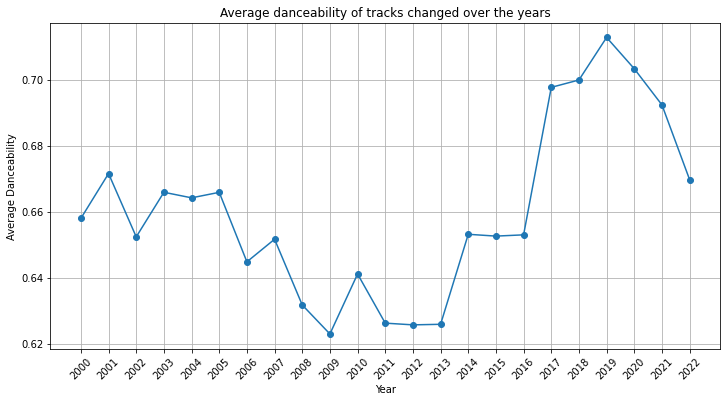

In [7]:
avg_danceability_track_over_years = df_cleaned.groupby('year')['danceability'].mean()

plt.figure(figsize = (12,6))
avg_danceability_track_over_years.plot(marker='o', linestyle='-')
plt.title('Average danceability of tracks changed over the years')
plt.xlabel('Year')
plt.ylabel('Average Danceability')
plt.grid(True)
plt.xticks(list(avg_danceability_track_over_years.index), rotation=45)
plt.show()

From 2000 to 2022, songs have become more dance-friendly. The biggest change was between 2000 and 2010. After 2010, this dance-friendly trend stayed pretty steady, but still high. This means newer songs, especially after 2010, are more suited for dancing than older ones from the early 2000s.

## Which artists have the highest average track popularity in the dataset?

In [8]:
artist_avg_track_popularity = df_cleaned.groupby('artist name')['track popularity'].mean()
artist_avg_track_popularity

artist name
*NSYNC         64.833333
112            62.000000
2 Chainz       72.000000
21 Savage      80.500000
24kGoldn       44.500000
                 ...    
girl in red    86.000000
iann dior      69.500000
iio            59.000000
t.A.T.u.       78.000000
will.i.am      74.000000
Name: track popularity, Length: 891, dtype: float64

In [9]:
top_artist_by_track_popularity = artist_avg_track_popularity.sort_values(ascending=False)
top_artist_by_track_popularity

artist name
Rema                    92.000000
Bizarrap                91.000000
Tom Odell               91.000000
Frank Ocean             90.000000
The Neighbourhood       88.500000
                          ...    
BTS                     24.571429
PARTYNEXTDOOR            4.000000
Lauren Spencer Smith     3.000000
Rosa Linn                3.000000
Fatman Scoop             0.000000
Name: track popularity, Length: 891, dtype: float64

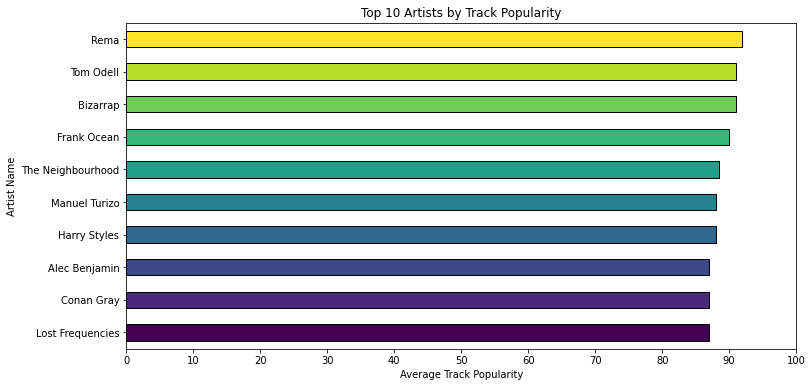

In [10]:
top_10_artist_track_popularity = top_artist_by_track_popularity.head(10)

#setting color pallete to have distinct colors for each artist
colors = plt.cm.viridis(np.linspace(0,1,len(top_10_artist_track_popularity)))

plt.figure(figsize=(12, 6))
top_10_artist_track_popularity.sort_values().plot(kind='barh', color=colors , edgecolor='black')
plt.title('Top 10 Artists by Track Popularity')
plt.xlabel('Average Track Popularity')
plt.ylabel('Artist Name')
plt.xticks(range(0, 101, 10))
plt.show()


# **Exploratory Analysis**
- Is there a correlation between track popularity and other musical features like danceability, energy, or valence?
- How do various genres (from artist_genres) differ in terms of musical features like loudness, tempo, or acousticness?
- Are there any distinct clusters of songs when you consider features like danceability, energy, and valence?

## Is there a correlation between track popularity and other musical features like danceability, energy, or valence?

In [11]:
correlation_features = ['danceability','energy','valence','track popularity']
correlation_matrix = df_cleaned[correlation_features].corr()
correlation_matrix

# extract the correlation values for track popularity
correlation_with_popularity = correlation_matrix['track popularity'].drop('track popularity')

correlation_with_popularity

danceability    0.006881
energy         -0.074284
valence        -0.067300
Name: track popularity, dtype: float64

- There's a very weak positive correlation (0.0069) between track popularity and danceability. This implies that as danceability increases, track popularity might slightly increase, but the relationship is almost negligible.
- There's a weak negative correlation (-0.0743) between track popularity and energy. This means that tracks with higher energy might be slightly less popular, but again, the relationship is weak.
- There's a weak negative correlation (-0.0673) between track popularity and valence. This suggests that tracks with higher valence (more positive mood) might be slightly less popular. <br>

However, it's essential to note that these correlations are weak and close to zero, indicating that there might not be a strong linear relationship between track popularity and these musical features in the dataset.

## How do various genres (from artist_genres) differ in terms of musical features like loudness, tempo, or acousticness?

In [12]:
# Convert the string representation of list to actual list
df_cleaned['artist genres'] = df_cleaned['artist genres'].apply(eval)

# Expand the genre lists into separate rows
genres_expanded = df_cleaned.explode('artist genres')

# Calculate the average values of the specified musical features for each genre
genre_features_avg = genres_expanded.groupby('artist genres')[['loudness', 'tempo', 'acousticness']].mean()

genre_features_avg.head()


C:\Users\AmnadunyPC\AppData\Local\Temp\ipykernel_15588\1015438222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['artist genres'] = df_cleaned['artist genres'].apply(eval)


,loudness,tempo,acousticness
artist genres,,,
acid house,-6.020000,128.034000,0.000313
acoustic pop,-6.746714,118.902143,0.350443
adult standards,-5.407333,127.685167,0.389817
afro r&b,-3.805000,93.005000,0.365000
afrobeats,-5.004667,106.657333,0.307333


In [13]:
# determine top 10 genres based on their occurrence
top_10_genres = genres_expanded['artist genres'].value_counts().head(10).index.tolist()
# top_10_genres = ['pop', 'dance pop', 'rap', 'pop rap', 'hip hop', 'r&b', 'urban contemporary', 'trap', 'southern hip hop', 'modern rock']

# Filter the genre_features_avg dataframe to include only the top 10 genres
top_10_genre_features_avg = genre_features_avg.loc[top_10_genres]
top_10_genre_features_avg

,loudness,tempo,acousticness
artist genres,,,
pop,-5.628395,120.763133,0.171455
dance pop,-5.272980,118.580015,0.128195
rap,-6.013491,120.399997,0.120576
pop rap,-5.871128,120.050043,0.118188
hip hop,-5.981228,118.709124,0.114992
r&b,-6.266056,113.802195,0.157812
urban contemporary,-6.142107,114.884107,0.178320
trap,-6.217821,123.481216,0.116095
southern hip hop,-6.054735,117.808992,0.127339


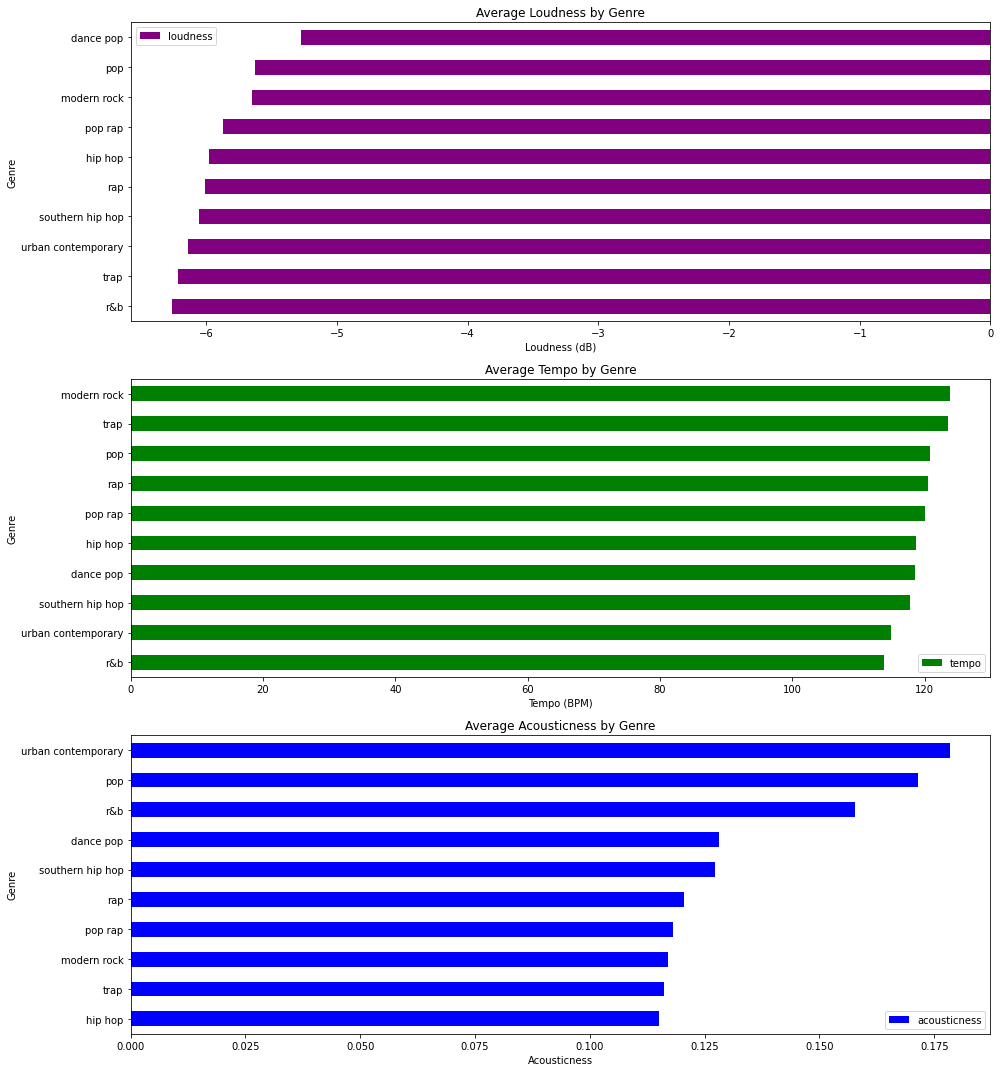

In [14]:
# Plotting the results
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 15))

# Loudness
top_10_genre_features_avg.sort_values(by='loudness').plot(y='loudness', kind='barh', ax=axes[0], color='purple')
axes[0].set_title('Average Loudness by Genre')
axes[0].set_xlabel('Loudness (dB)')
axes[0].set_ylabel('Genre')

# Tempo
top_10_genre_features_avg.sort_values(by='tempo').plot(y='tempo', kind='barh', ax=axes[1], color='green')
axes[1].set_title('Average Tempo by Genre')
axes[1].set_xlabel('Tempo (BPM)')
axes[1].set_ylabel('Genre')

# Acousticness
top_10_genre_features_avg.sort_values(by='acousticness').plot(y='acousticness', kind='barh', ax=axes[2], color='blue')
axes[2].set_title('Average Acousticness by Genre')
axes[2].set_xlabel('Acousticness')
axes[2].set_ylabel('Genre')

plt.tight_layout()
plt.show()

From top 10 genres can be concluded :
- **Average Loudness by Genre**: Most genres have average loudness values between -6 and -5 dB, with "R&B" being the softest and "Dance Pop" being the loudest.
- **Average Tempo by Genre**: "R&B" and "Urban Contemporary" have the slowest tempos, while "Trap" and "Modern Rock" have the fastest tempos.
- **Average Acousticness by Genre**: "Urban Contemporary" and "Pop" have higher acousticness values, indicating more acoustic sound in their tracks. On the other hand, genres like "Trap", "Modern Rock", and "Hip Hop" have lower acousticness values, indicating more electronic and synthesized sounds.

## Are there any distinct clusters of songs when you consider features like danceability, energy, and valence?

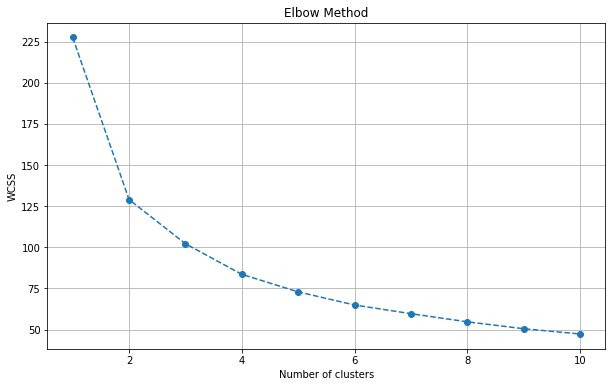

In [15]:
from sklearn.cluster import KMeans

# extracting specified features
features_cluster = df_cleaned[['danceability','energy','valence']]

# find optimal number of clusters using elbow method
wcss = [] # within-cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_cluster)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

C:\Users\AmnadunyPC\AppData\Local\Temp\ipykernel_15588\2858299637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(features_cluster)


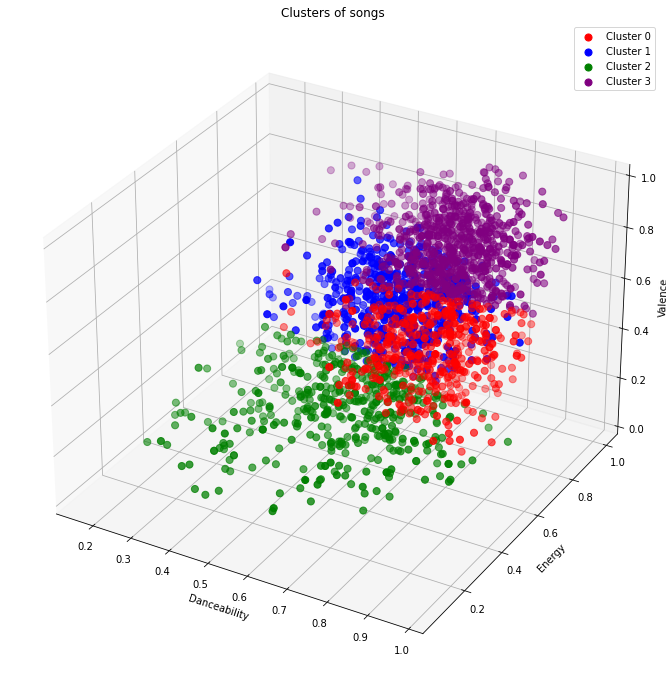

In [16]:
# Applying k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(features_cluster)

# Visualization of the clusters in 3D space using the selected features
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'purple']

for i in range(4):
    ax.scatter(df_cleaned[df_cleaned['Cluster'] == i]['danceability'],
               df_cleaned[df_cleaned['Cluster'] == i]['energy'],
               df_cleaned[df_cleaned['Cluster'] == i]['valence'],
               c = colors[i],
               label = 'Cluster ' + str(i),
               s = 50)

ax.set_title('Clusters of songs')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')
ax.legend()
plt.show()


In [17]:
# Calculate the average values of the features for each cluster
cluster_summary = df_cleaned.groupby('Cluster').agg({
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Number of Songs'})

cluster_summary


,danceability,energy,valence,Number of Songs
Cluster,,,,
0,0.752696,0.580653,0.516884,519
1,0.564280,0.816719,0.466285,565
2,0.565696,0.530635,0.227067,460
3,0.725721,0.776713,0.786825,755


Based on the summary, can be conluded that :
1. Cluster 0 (519 songs)
- Danceability: 0.753
- Energy: 0.581
- Valence: 0.517
- This cluster represents songs that are highly danceable with moderate energy. The valence suggests that these songs have a balanced mood, neither too happy nor too sad. They might be ideal for light dancing or background music during social gatherings.

2. Cluster 1 (565 songs)
- Danceability: 0.564
- Energy: 0.817
- Valence: 0.466
- Songs in this cluster have moderate danceability but are very energetic. The valence indicates a neutral to slightly positive mood. These could be tracks that are suitable for high-energy activities or workouts, given their energetic nature.

3. Cluster 2 (460 songs)
- Danceability: 0.566
- Energy: 0.531
- Valence: 0.227
- This cluster contains songs with moderate danceability and energy, but the low valence suggests they have a more melancholic or subdued mood. These songs might be suitable for introspective moments, relaxation, or situations where a calm or somber atmosphere is desired.

4. Cluster 3 (755 songs)
- Danceability: 0.726
- Energy: 0.777
- Valence: 0.787
- The songs in this cluster are characterized by high values across all three features. This suggests they are lively, danceable, and carry a very positive mood. Such tracks would be ideal for parties, celebrations, or any event where an uplifting atmosphere is desired.

The clusters provide a clear categorization of songs based on their mood and energy. Cluster 3 represents lively and cheerful songs, Cluster 1 contains energetic tracks suitable for active moments, Cluster 0 offers balanced tunes ideal for casual listening or light dancing, while Cluster 2 has more contemplative or somber tracks. Recognizing these clusters can be immensely valuable for curating playlists tailored to different moods and activities.

# **Comparative Analysis**
   - How do the top 10% most popular tracks differ from the bottom 10% in terms of musical characteristics?
   - Are certain genres more prevalent in specific years?


## How do the top 10% most popular tracks differ from the bottom 10% in terms of musical characteristics?


In [24]:
# Determine the thresholds for the top 10% and bottom 10% of track popularity
top_10_percentile = df_cleaned['track popularity'].quantile(0.90)
bottom_10_percentile = df_cleaned['track popularity'].quantile(0.10)

# Extract the top and bottom 10% most popular tracks
top_10_percent_tracks = df_cleaned[df_cleaned['track popularity'] >= top_10_percentile]
bottom_10_percent_tracks = df_cleaned[df_cleaned['track popularity'] <= bottom_10_percentile]

top_10_percent_tracks.shape[0], bottom_10_percent_tracks.shape[0]


(279, 271)

In [25]:
# List of musical characteristics to compare
musical_characteristics = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                           'speechiness', 'acousticness', 'instrumentalness', 
                           'liveness', 'valence', 'tempo', 'duration ms', 'time signature']

# Calculate the average values for each characteristic for the top and bottom 10% most popular tracks
top_10_percent_avg = top_10_percent_tracks[musical_characteristics].mean()
bottom_10_percent_avg = bottom_10_percent_tracks[musical_characteristics].mean()

# Combine the average values into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Characteristic': musical_characteristics,
    'Top 10% Avg': top_10_percent_avg.values,
    'Bottom 10% Avg': bottom_10_percent_avg.values
})

comparison_df


,Characteristic,Top 10% Avg,Bottom 10% Avg
0,danceability,0.657659,0.653779
1,energy,0.649423,0.717007
2,key,5.068100,5.549815
3,loudness,-6.093240,-5.838926
4,mode,0.637993,0.579336
5,speechiness,0.086055,0.094632
6,acousticness,0.218345,0.143995
7,instrumentalness,0.010269,0.021871
8,liveness,0.169943,0.179150
9,valence,0.494825,0.567145


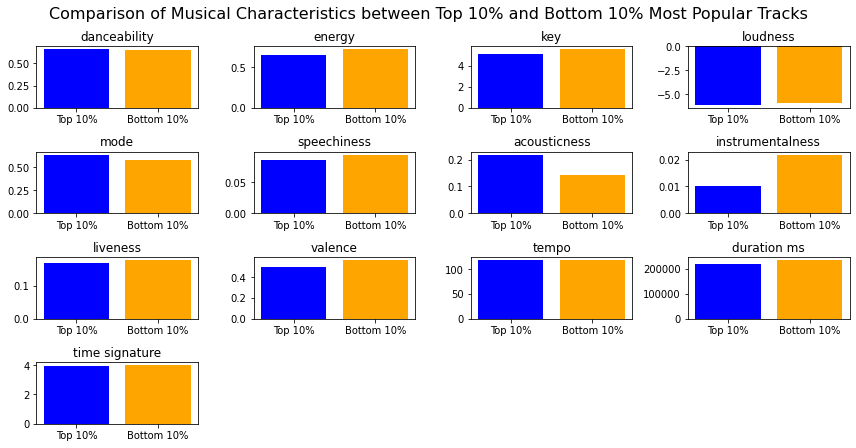

In [26]:
# Visualizations
plt.figure(figsize=(12,6))

# Create bar plots for each characteristic
for idx, characteristic in enumerate(musical_characteristics, 1):
    plt.subplot(4, 4, idx)
    plt.bar(['Top 10%', 'Bottom 10%'], [top_10_percent_avg[characteristic], bottom_10_percent_avg[characteristic]], color=['blue', 'orange'])
    plt.title(characteristic)
    plt.tight_layout()

plt.suptitle('Comparison of Musical Characteristics between Top 10% and Bottom 10% Most Popular Tracks', y=1.03, fontsize=16)
plt.show()

From the result can be concluded as :
- **Danceability**: The top 10% tracks are slightly more danceable on average than the bottom 10% tracks.
- **Energy**: The bottom 10% tracks have more energy on average than the top 10% tracks.
- **Key**: The average key for the bottom 10% tracks is slightly higher than that of the top 10% tracks.
- **Loudness**: The bottom 10% tracks are on average louder than the top 10% tracks.
- **Mode**: The top 10% tracks have a slightly higher mode value (indicating they are more often in a major key) compared to the bottom 10% tracks.
- **Speechiness**: The bottom 10% tracks have a slightly higher speechiness value than the top 10% tracks.
- **Acousticness**: The top 10% tracks are more acoustic on average than the bottom 10% tracks.
- **Instrumentalness**: The bottom 10% tracks have a slightly higher instrumentalness value than the top 10% tracks.
- **Liveness**: The bottom 10% tracks have a slightly higher liveness value than the top 10% tracks.
- **Valence**: The bottom 10% tracks have a higher valence (indicating they sound more positive) on average than the top 10% tracks.
- **Tempo**: The average tempo is quite similar for both groups, with the top 10% tracks having a slightly faster tempo on average.
- **Duration**: The bottom 10% tracks are on average longer in duration than the top 10% tracks.
- **Time Signature**: Both groups have a similar average time signature, close to 4, which is typical for many songs.

These observations provide insights into the musical characteristics that might be associated with the popularity of tracks. However, it's essential to remember that correlation does not imply causation, and multiple factors influence the popularity of a track.

## Are certain genres more prevalent in specific years?


In [27]:
# Explode the artist_genres column to have one genre per row
exploded_data = df_cleaned.explode('artist genres')

# Group by year and artist_genres to get the count of each genre in each year
genre_counts_per_year = exploded_data.groupby(['year', 'artist genres']).size().reset_index(name='count')

# Get the top genres for each year
top_genres_per_year = genre_counts_per_year.groupby('year').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

top_genres_per_year


,year,artist genres,count
0,2000,dance pop,24
1,2000,r&b,20
2,2000,urban contemporary,20
3,2000,pop,18
4,2000,contemporary r&b,16
...,...,...,...
110,2022,pop,54
111,2022,rap,16
112,2022,canadian pop,10
113,2022,trap latino,9


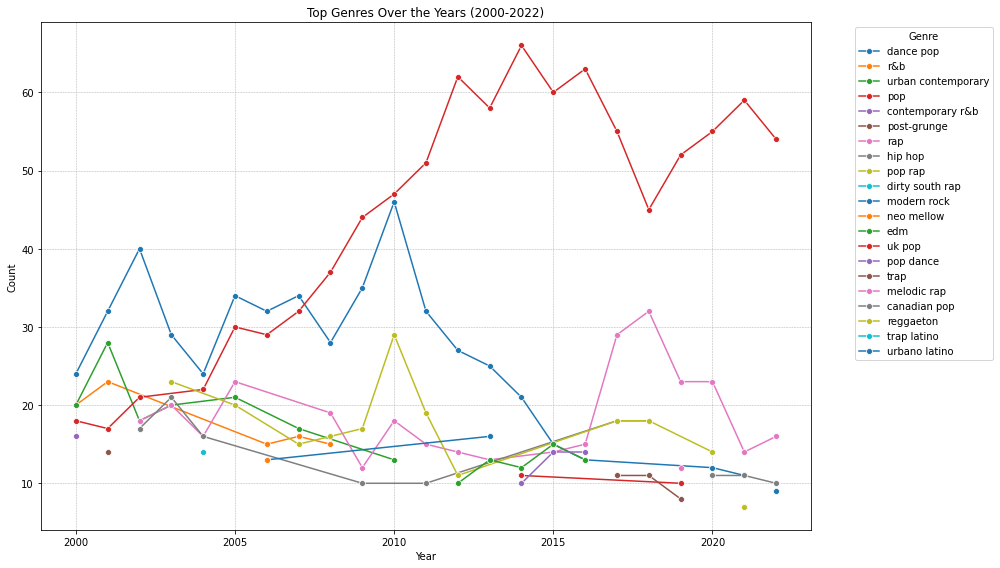

In [28]:
# plot the figure
plt.figure(figsize=(14, 8))

# Plotting the top genres across the years
for genre in top_genres_per_year['artist genres'].unique():
    subset = top_genres_per_year[top_genres_per_year['artist genres'] == genre]
    sns.lineplot(x='year', y='count', data=subset, label=genre, marker='o')

plt.title('Top Genres Over the Years (2000-2022)')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Based on the graph, here are the trends of top genres from 2000 to 2022. The following are few observations :
- **Pop**: The genre "pop" has consistently been one of the top genres across the years. Its prevalence has seen some fluctuations but remains significant.
- **Dance Pop**: "Dance pop" has been popular, especially in the early 2000s, with a resurgence in recent years.
- **Rap**: The "rap" genre saw a significant increase in prevalence in the last few years, indicating its rising popularity.
- **Urbano Latino & Trap Latino**: Both of these genres have made an appearance in recent years, showcasing the increasing global influence and diversity in popular music.